In [ ]:
import pandas as pd
import json

In [ ]:
# Step 1: Load CSV data
csv_file = "Air_Quality_Data_2012_2024.csv"
csv_df = pd.read_csv(csv_file)

In [ ]:
# Step 2: Load JSON data from CDC API
import requests # Import the requests module to make HTTP requests
json_url = "https://data.cityofnewyork.us/api/views/c3uy-2p5r/rows.json?accessType=DOWNLOAD"
response = requests.get(json_url)
json_data = response.json()

In [ ]:
# Step 3: Parse JSON into DataFrame
json_columns = [col["name"] for col in json_data["meta"]["view"]["columns"]]
json_records = json_data["data"]
json_df = pd.DataFrame(json_records, columns=json_columns)

In [ ]:
# Step 4: Clean and format CSV
csv_df.columns = csv_df.columns.str.strip().str.lower().str.replace(" ", "_")
csv_df = csv_df.dropna(how='all')

In [ ]:
# Step 5: Clean and format JSON
json_df.columns = json_df.columns.str.strip().str.lower().str.replace(" ", "_")
json_df = json_df.dropna(how='all')

In [ ]:
# Optional: Convert any 'date' columns to datetime
for df in [csv_df, json_df]:
    for col in df.columns:
        if 'date' in col:
            try:
                df[col] = pd.to_datetime(df[col])
            except:
                continue

In [ ]:
# Step 6: Identify possible common columns
common_columns = set(csv_df.columns).intersection(set(json_df.columns))
print("Common Columns:", common_columns)

Common Columns: {'indicator_id', 'time_period', 'geo_place_name'}


In [ ]:
print("\n🔍 Sample rows:")
# Assuming you wanted to print the CSV data:
print(csv_df.head())


🔍 Sample rows:
   indicator_id    pm10    no2    so2    co  aqi time_period geo_place_name
0        117.85   67.67  90.14  47.00  5.33   67    1/1/2012       New York
1        147.09  240.39  65.81  19.46  3.68  135    1/2/2012       New York
2         59.64  139.76  12.94  46.11  7.28  212    1/3/2012       New York
3        185.44  151.23  53.61  18.49  0.33  481    1/4/2012       New York
4        100.91  243.43  37.83  22.87  2.80  149    1/5/2012       New York


In [ ]:
# Step 4: Display columns and sample data
print("🧾 Columns in the NYC JSON dataset:")
print(json_df.columns.tolist()) # Changed nyc_df to json_df

🧾 Columns in the NYC JSON dataset:
['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at', 'updated_meta', 'meta', 'unique_id', 'indicator_id', 'name', 'measure', 'measure_info', 'geo_type_name', 'geo_join_id', 'geo_place_name', 'time_period', 'start_date', 'data_value', 'message']


In [ ]:
print("\nJSON Descriptive Statistics:")
print(json_df.describe())


JSON Descriptive Statistics:
       position    created_at                     updated_at updated_meta  \
count   18862.0  1.886200e+04                          18862            0   
mean        0.0  1.742844e+09  1970-01-01 00:00:01.742844336          NaT   
min         0.0  1.742844e+09  1970-01-01 00:00:01.742844336          NaT   
25%         0.0  1.742844e+09  1970-01-01 00:00:01.742844336          NaT   
50%         0.0  1.742844e+09  1970-01-01 00:00:01.742844336          NaT   
75%         0.0  1.742844e+09  1970-01-01 00:00:01.742844336          NaT   
max         0.0  1.742844e+09  1970-01-01 00:00:01.742844336          NaT   
std         0.0  0.000000e+00                            NaN          NaN   

                          start_date  
count                          18862  
mean   2015-03-01 00:12:40.385961216  
min              2005-01-01 00:00:00  
25%              2011-06-01 00:00:00  
50%              2015-01-01 00:00:00  
75%              2019-01-01 00:00:00  
max

In [ ]:
# Step 7: Merge on 'geo_place_name', 'time_period','indicator_id' if both exist
join_columns = ['geo_place_name', 'time_period','indicator_id']
for col in join_columns:
    if col not in csv_df.columns or col not in json_df.columns:
        raise ValueError(f"'{col}' column not found in both datasets")

In [ ]:
# Step 8: Perform inner merge
# Convert 'indicator_id' to a common type (e.g., string) before merging
csv_df['indicator_id'] = csv_df['indicator_id'].astype(str)  # Convert to string in csv_df
json_df['indicator_id'] = json_df['indicator_id'].astype(str) # Convert to string in json_df

In [ ]:
# Perform the merge operation and store the result in 'merged_df'
merged_df = pd.merge(csv_df, json_df, on=join_columns, how='inner') # This line was missing
# %%
# Step 9: Save merged result (optional)
merged_df.to_csv("merged_air_quality_data.csv", index=False)

In [ ]:
# Perform merge based on the index of both datasets
merged_df = pd.merge(csv_df, json_df, left_index=True, right_index=True, how='inner')  # or 'outer', 'left', 'right'

In [ ]:
print("\nCSV Descriptive Statistics:")
print(csv_df.describe())


CSV Descriptive Statistics:
               pm10           no2           so2            co           aqi
count  23745.000000  23745.000000  23745.000000  23745.000000  23745.000000
mean     160.221959     52.539567     26.115908      5.063222    248.586987
std       80.860111     27.392759     13.814194      2.853152    143.946218
min       20.010000      5.000000      2.000000      0.100000      0.000000
25%       90.320000     28.610000     14.240000      2.590000    125.000000
50%      160.440000     52.700000     26.290000      5.100000    248.000000
75%      230.020000     76.260000     38.180000      7.520000    374.000000
max      299.980000    100.000000     50.000000     10.000000    499.000000


In [ ]:
# Descriptive statistics for Merged data
print("\nMerged Descriptive Statistics:")
print(merged_df.describe())


Merged Descriptive Statistics:
               pm10           no2           so2            co           aqi  \
count  18862.000000  18862.000000  18862.000000  18862.000000  18862.000000   
mean     160.085732     52.590177     26.171064      5.068596    249.123052   
min       20.010000      5.000000      2.000000      0.100000      0.000000   
25%       90.320000     28.692500     14.362500      2.590000    125.000000   
50%      160.105000     52.765000     26.355000      5.110000    249.000000   
75%      229.907500     76.287500     38.240000      7.530000    374.000000   
max      299.980000    100.000000     50.000000     10.000000    499.000000   
std       80.979131     27.423592     13.784465      2.853901    143.881929   

       position    created_at                     updated_at updated_meta  \
count   18862.0  1.886200e+04                          18862            0   
mean        0.0  1.742844e+09  1970-01-01 00:00:01.742844336          NaT   
min         0.0  1.742844

In [ ]:
# Check for missing values in CSV data
print("\nCSV Missing Data:")
print(csv_df.isnull().sum())

# Check for missing values in JSON data
print("\nJSON Missing Data:")
print(json_df.isnull().sum())

# Check for missing values in Merged data
print("\nMerged Missing Data:")
print(merged_df.isnull().sum())


CSV Missing Data:
indicator_id      0
pm10              0
no2               0
so2               0
co                0
aqi               0
time_period       0
geo_place_name    0
dtype: int64

JSON Missing Data:
sid                   0
id                    0
position              0
created_at            0
created_meta      18862
updated_at            0
updated_meta      18862
meta                  0
unique_id             0
indicator_id          0
name                  0
measure               0
measure_info          0
geo_type_name         0
geo_join_id           0
geo_place_name        0
time_period           0
start_date            0
data_value            0
message           18862
dtype: int64

Merged Missing Data:
indicator_id_x          0
pm10                    0
no2                     0
so2                     0
co                      0
aqi                     0
time_period_x           0
geo_place_name_x        0
sid                     0
id                      0
position     

In [ ]:
# Check for duplicates in CSV data
print("\nCSV Duplicates:")
print(csv_df.duplicated().sum())

# Check for duplicates in JSON data
print("\nJSON Duplicates:")
print(json_df.duplicated().sum())

# Check for duplicates in Merged data
print("\nMerged Duplicates:")
print(merged_df.duplicated().sum())


CSV Duplicates:
0

JSON Duplicates:
0

Merged Duplicates:
0


In [ ]:
print("\n🔍 Sample rows:")
# Assuming you wanted to print the CSV data:
print(merged_df.head())


🔍 Sample rows:
  indicator_id_x    pm10    no2    so2    co  aqi time_period_x  \
0         117.85   67.67  90.14  47.00  5.33   67      1/1/2012   
1         147.09  240.39  65.81  19.46  3.68  135      1/2/2012   
2          59.64  139.76  12.94  46.11  7.28  212      1/3/2012   
3         185.44  151.23  53.61  18.49  0.33  481      1/4/2012   
4         100.91  243.43  37.83  22.87  2.80  149      1/5/2012   

  geo_place_name_x                 sid                                    id  \
0         New York  row-vjbf.642r-veje  00000000-0000-0000-A8E3-2581898A3B49   
1         New York  row-83bw-pu9c-jigw  00000000-0000-0000-DD77-32091B010D18   
2         New York  row-rmys_ykrv-fw53  00000000-0000-0000-0058-3F6F57111533   
3         New York  row-i32z~j9dd.k8hv  00000000-0000-0000-A2C2-8BB5948C1C1A   
4         New York  row-3yhd~8z64-zart  00000000-0000-0000-B020-22C43FA14773   

   ...                    name  measure measure_info geo_type_name  \
0  ...  Nitrogen dioxide (NO2)

In [ ]:
# Step 9: Save merged result to a CSV file (optional)
merged_df.to_csv("merged_air_quality_data.csv", index=False)

In [ ]:
# Step 2: Summary Statistics
# Generate summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(merged_df.describe())


Summary Statistics for Numerical Columns:
               pm10           no2           so2            co           aqi  \
count  18862.000000  18862.000000  18862.000000  18862.000000  18862.000000   
mean     160.085732     52.590177     26.171064      5.068596    249.123052   
min       20.010000      5.000000      2.000000      0.100000      0.000000   
25%       90.320000     28.692500     14.362500      2.590000    125.000000   
50%      160.105000     52.765000     26.355000      5.110000    249.000000   
75%      229.907500     76.287500     38.240000      7.530000    374.000000   
max      299.980000    100.000000     50.000000     10.000000    499.000000   
std       80.979131     27.423592     13.784465      2.853901    143.881929   

       position    created_at                     updated_at updated_meta  \
count   18862.0  1.886200e+04                          18862            0   
mean        0.0  1.742844e+09  1970-01-01 00:00:01.742844336          NaT   
min         0.

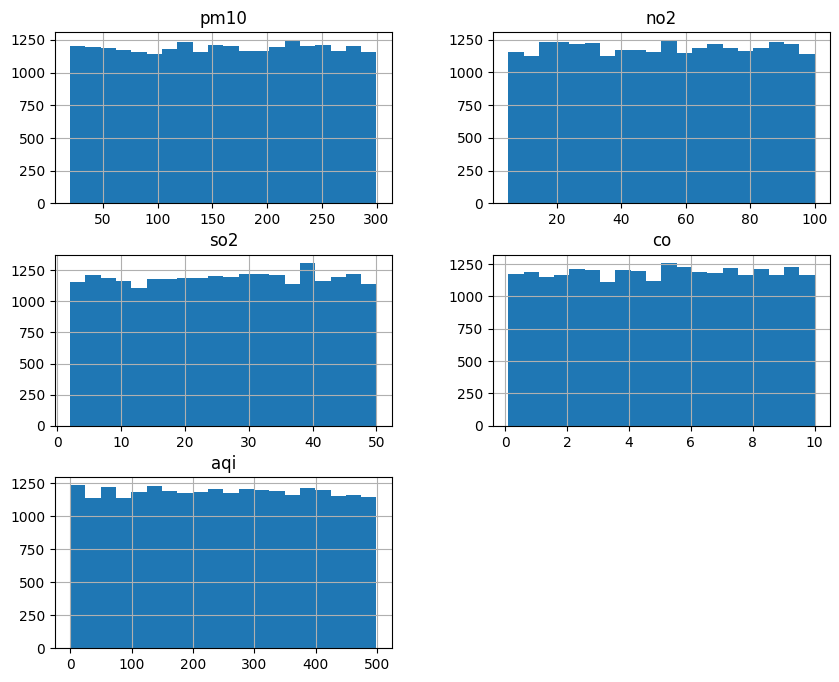

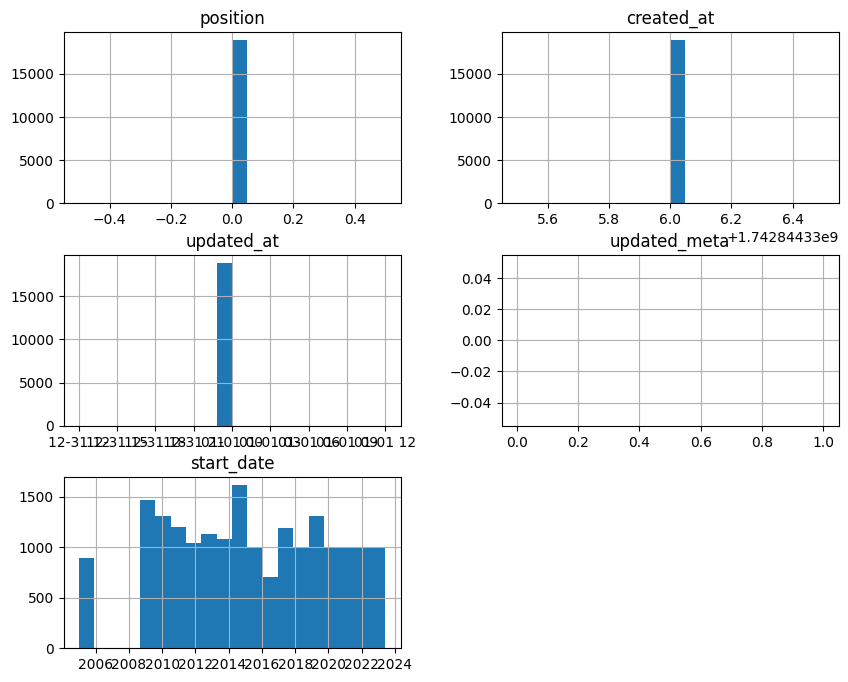

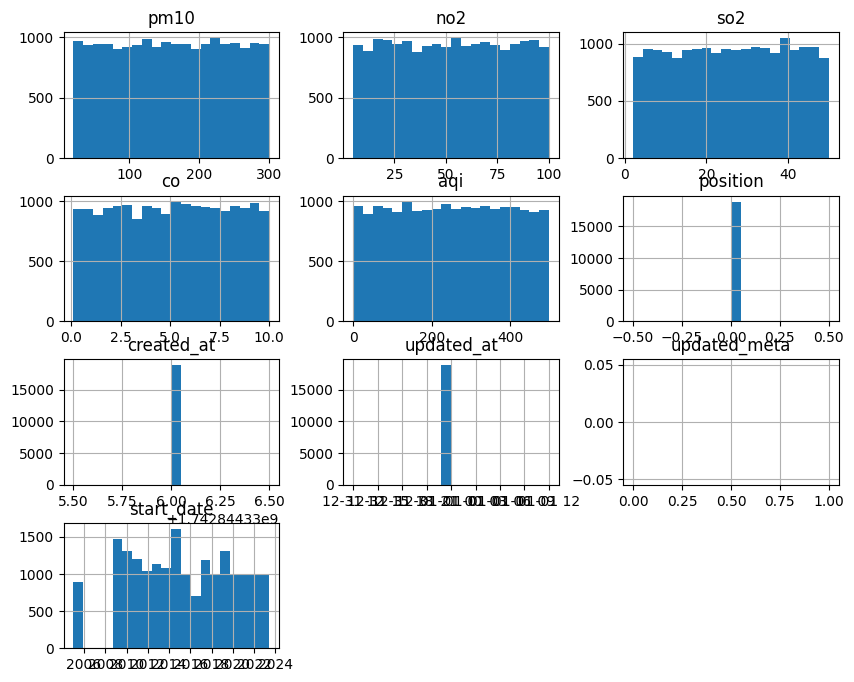

In [ ]:
# Plot histograms for numerical columns in the CSV data
csv_df.hist(bins=20, figsize=(10, 8))
plt.show()

# Plot histograms for numerical columns in the JSON data
json_df.hist(bins=20, figsize=(10, 8))
plt.show()

# Plot histograms for numerical columns in the Merged data
merged_df.hist(bins=20, figsize=(10, 8))
plt.show()

In [ ]:
#Correlation Analysis on the merged dataset
# Calculate correlation matrix
print("\nCorrelation Matrix:")

# Select only numeric columns before calculating correlation
numeric_merged_df = merged_df.select_dtypes(include=['number'])

correlation_matrix = numeric_merged_df.corr()
print(correlation_matrix)


Correlation Matrix:
                pm10       no2       so2        co       aqi  position  \
pm10        1.000000  0.004155  0.008392 -0.000528  0.006870       NaN   
no2         0.004155  1.000000 -0.010160  0.011657  0.000611       NaN   
so2         0.008392 -0.010160  1.000000 -0.000866  0.002980       NaN   
co         -0.000528  0.011657 -0.000866  1.000000 -0.000063       NaN   
aqi         0.006870  0.000611  0.002980 -0.000063  1.000000       NaN   
position         NaN       NaN       NaN       NaN       NaN       NaN   
created_at       NaN       NaN       NaN       NaN       NaN       NaN   

            created_at  
pm10               NaN  
no2                NaN  
so2                NaN  
co                 NaN  
aqi                NaN  
position           NaN  
created_at         NaN  


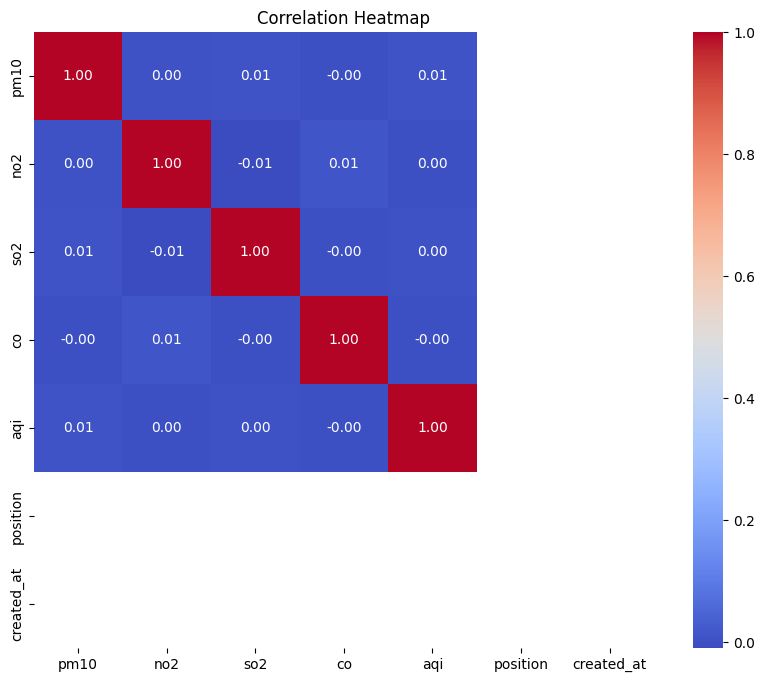

In [ ]:
# Visualize the correlation matrix with a heatmap
import seaborn as sns # Import the seaborn library and assign it to the alias 'sns'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


Value counts for indicator_id_x:
indicator_id_x
190.66    7
72.48     7
58.85     7
192.2     6
96.55     6
         ..
181.18    1
55.78     1
158.9     1
63.44     1
134.81    1
Name: count, Length: 11892, dtype: int64


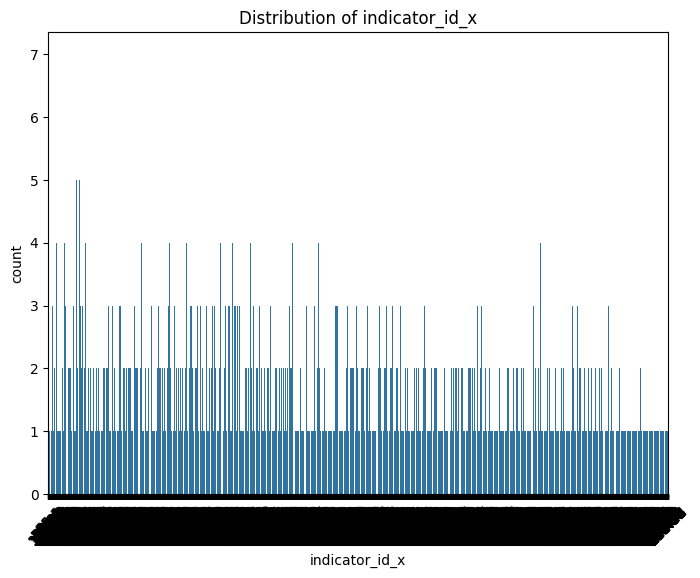


Value counts for time_period_x:
time_period_x
8/19/2024     4
8/18/2024     4
8/17/2024     4
8/16/2024     4
8/15/2024     4
             ..
12/27/2024    3
12/28/2024    3
12/29/2024    3
12/30/2024    3
12/31/2024    3
Name: count, Length: 4749, dtype: int64


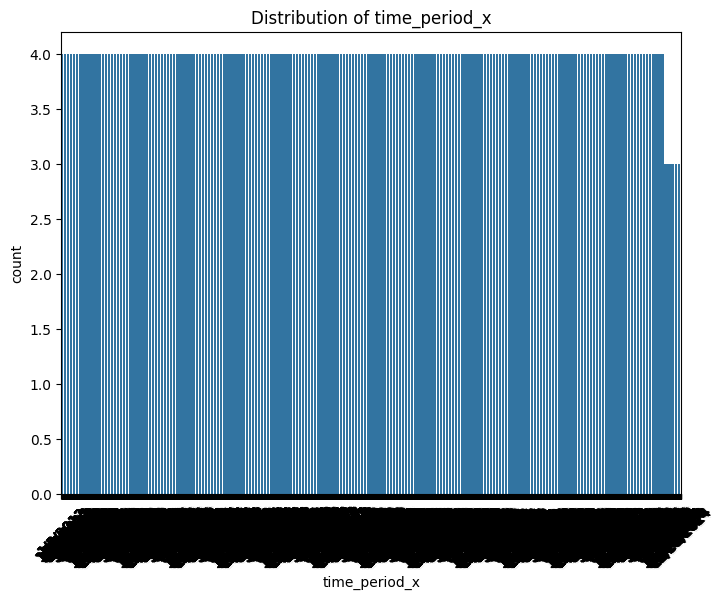


Value counts for geo_place_name_x:
geo_place_name_x
New York       4749
Los Angeles    4749
Chicago        4749
Houston        4615
Name: count, dtype: int64


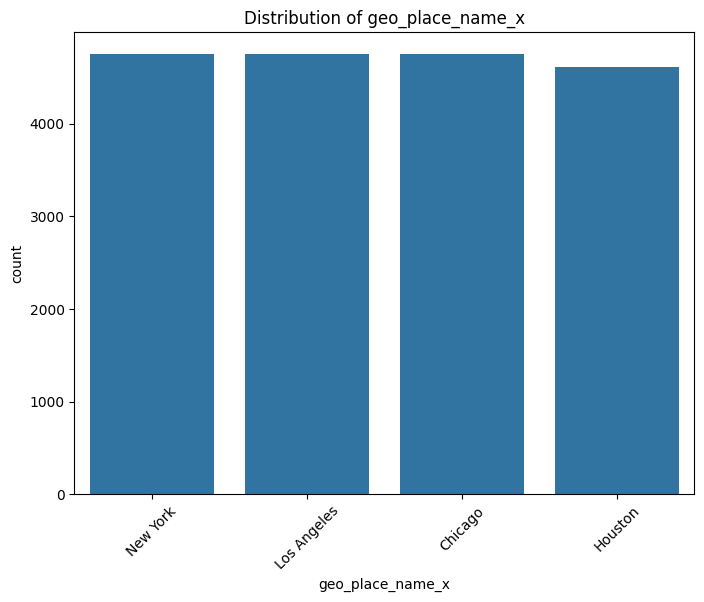


Value counts for sid:
sid
row-fpe8_9wz3.9ktk    1
row-vjbf.642r-veje    1
row-83bw-pu9c-jigw    1
row-rmys_ykrv-fw53    1
row-i32z~j9dd.k8hv    1
                     ..
row-92cy_xxi3_8qwt    1
row-ckyy_u2wk~c4bb    1
row-5kxv-6yky~k6pb    1
row-ztm5-33w7~s5mr    1
row-7w8n_hut6-vb23    1
Name: count, Length: 18862, dtype: int64


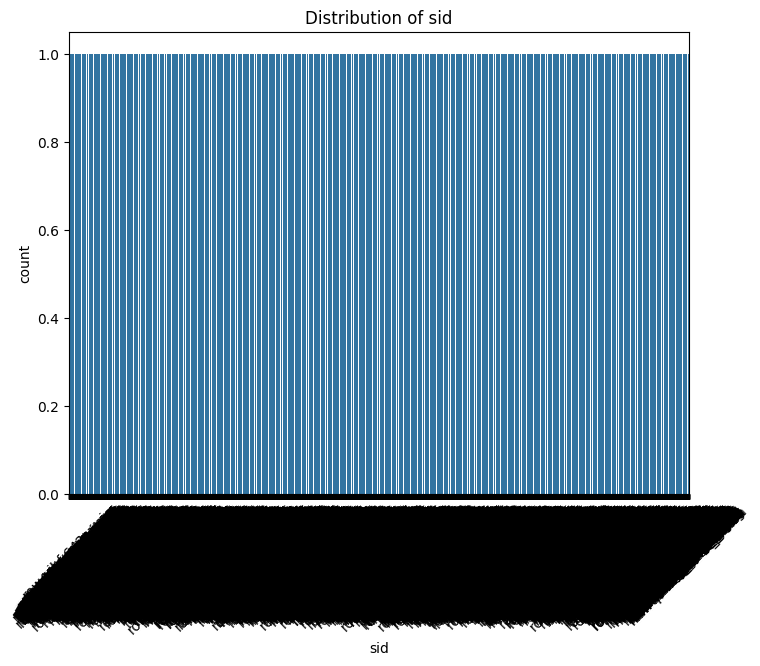


Value counts for id:
id
00000000-0000-0000-3577-1D9C13CE4722    1
00000000-0000-0000-A8E3-2581898A3B49    1
00000000-0000-0000-DD77-32091B010D18    1
00000000-0000-0000-0058-3F6F57111533    1
00000000-0000-0000-A2C2-8BB5948C1C1A    1
                                       ..
00000000-0000-0000-7813-2AB5266EAF62    1
00000000-0000-0000-02B2-42D30A01E5DA    1
00000000-0000-0000-5B38-560FF3427E9F    1
00000000-0000-0000-4A77-D126DD5D6F6D    1
00000000-0000-0000-AA0E-A1479D911C4D    1
Name: count, Length: 18862, dtype: int64


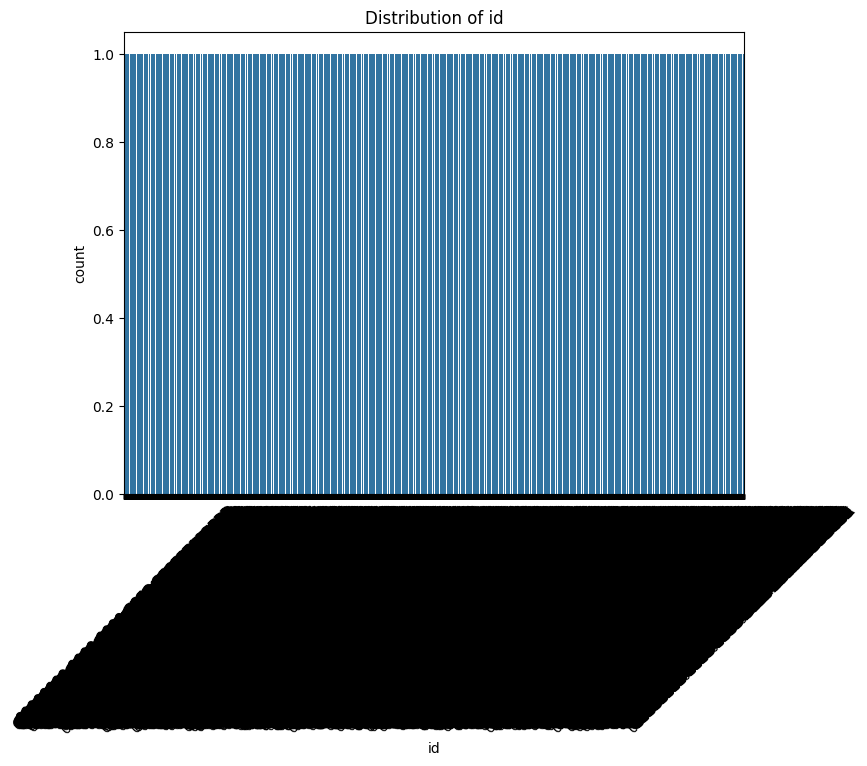


Value counts for created_meta:
Series([], Name: count, dtype: int64)


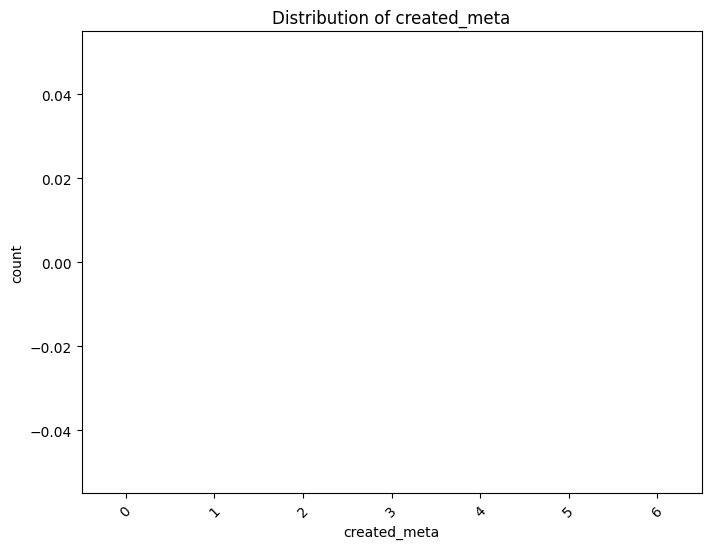


Value counts for meta:
meta
{ }    18862
Name: count, dtype: int64


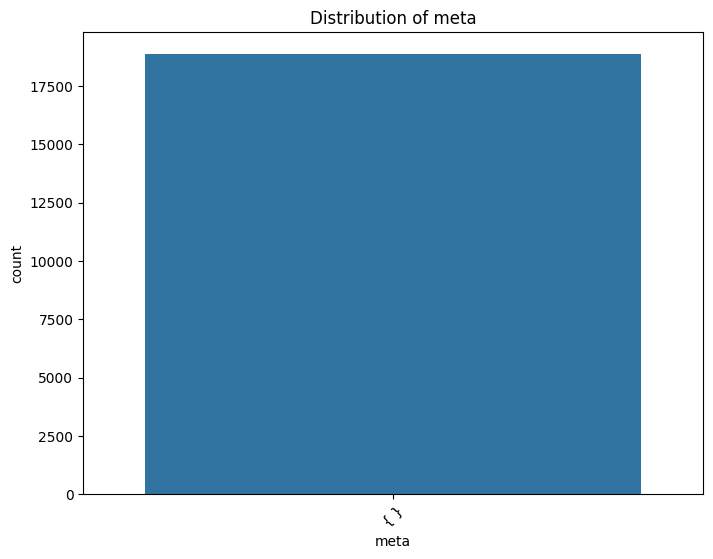


Value counts for unique_id:
unique_id
167586    1
336867    1
336741    1
550157    1
412802    1
         ..
170430    1
826075    1
603098    1
741290    1
336888    1
Name: count, Length: 18862, dtype: int64


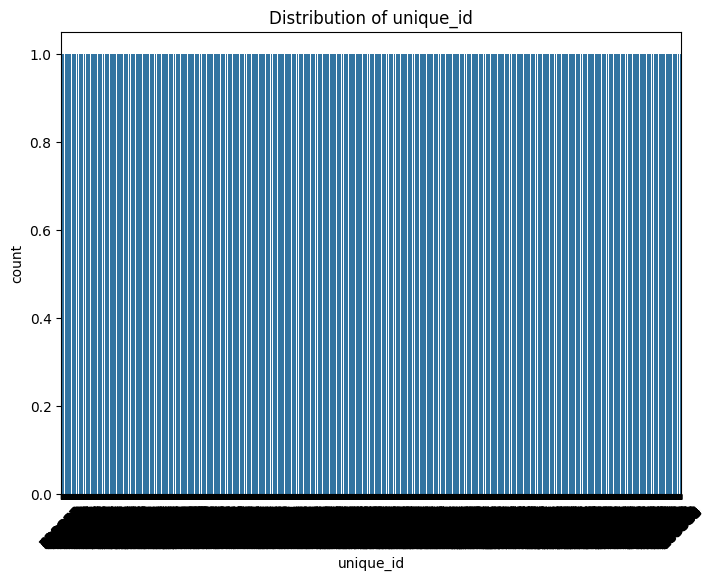


Value counts for indicator_id_y:
indicator_id_y
375    6345
365    6345
386    2115
644     321
643     321
645     321
657     240
639     240
650     240
655     240
659     240
648     240
661     240
652     240
651     240
653     240
647     203
646     203
640      96
642      96
641      96
Name: count, dtype: int64


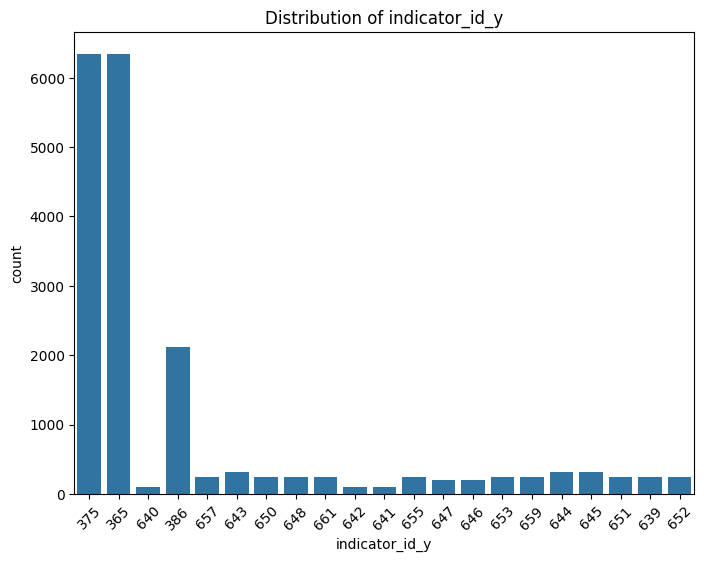


Value counts for name:
name
Nitrogen dioxide (NO2)                                    6345
Fine particles (PM 2.5)                                   6345
Ozone (O3)                                                2115
Asthma emergency department visits due to PM2.5            480
Asthma hospitalizations due to Ozone                       480
Asthma emergency departments visits due to Ozone           480
Annual vehicle miles traveled (cars)                       321
Annual vehicle miles traveled (trucks)                     321
Annual vehicle miles traveled                              321
Respiratory hospitalizations due to PM2.5 (age 20+)        240
Deaths due to PM2.5                                        240
Cardiac and respiratory deaths due to Ozone                240
Cardiovascular hospitalizations due to PM2.5 (age 40+)     240
Outdoor Air Toxics - Formaldehyde                          203
Outdoor Air Toxics - Benzene                               203
Boiler Emissions- Total PM

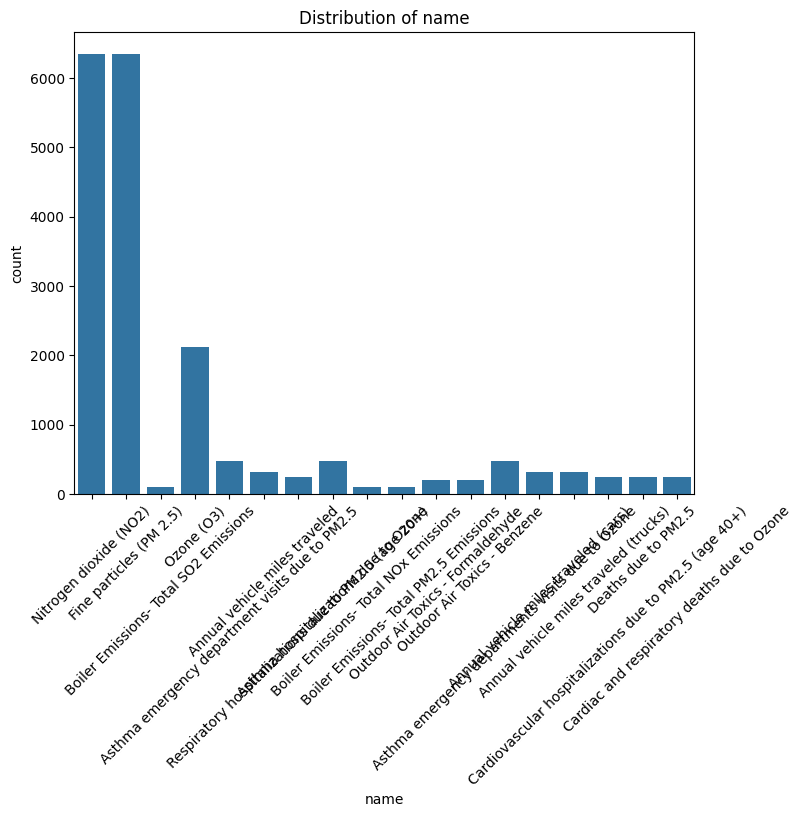


Value counts for measure:
measure
Mean                                    14805
Million miles                             963
Estimated annual rate (age 18+)           720
Estimated annual rate                     720
Estimated annual rate (under age 18)      720
Annual average concentration              406
Number per km2                            288
Estimated annual rate (age 30+)           240
Name: count, dtype: int64


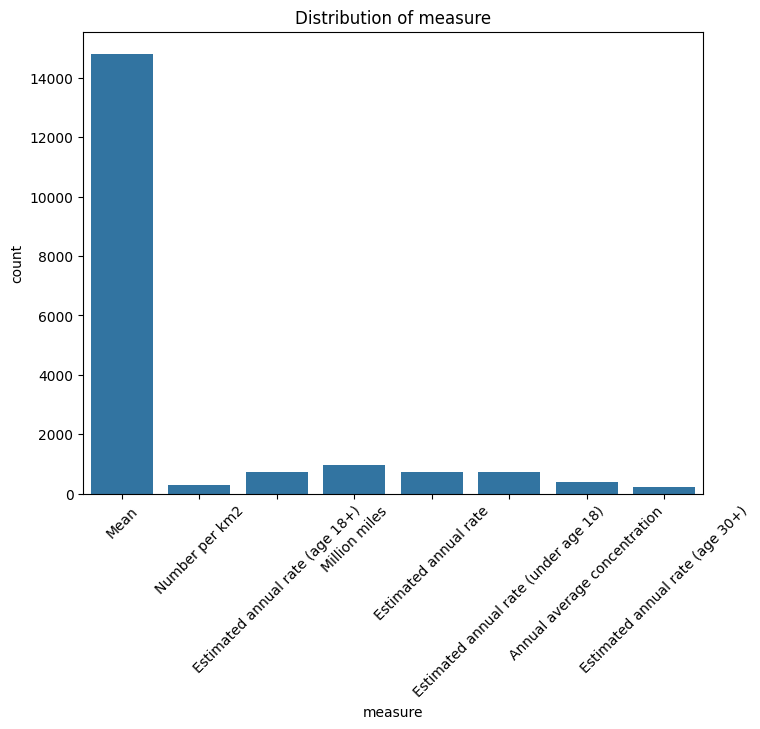


Value counts for measure_info:
measure_info
ppb                     8460
mcg/m3                  6345
per 100,000 adults      1440
per square mile          963
per 100,000 children     720
Âµg/m3                   406
number                   288
per 100,000              240
Name: count, dtype: int64


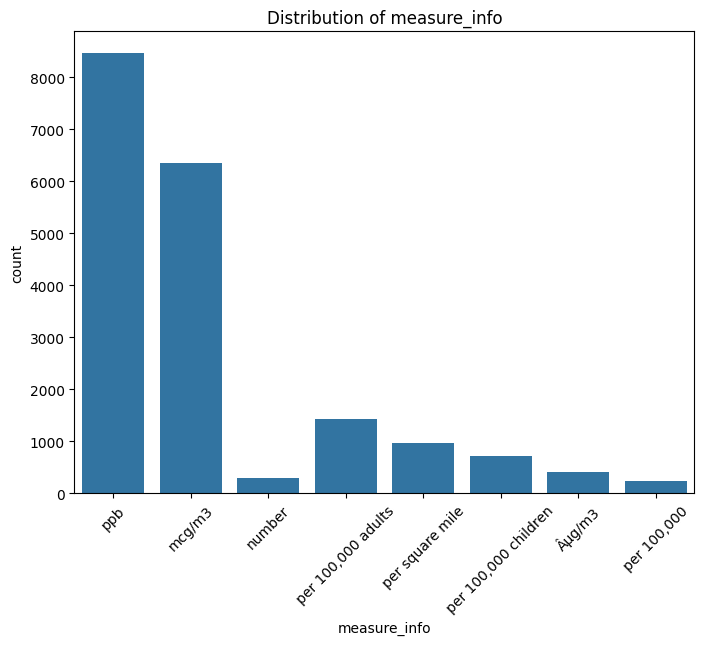


Value counts for geo_type_name:
geo_type_name
UHF42       7392
CD          6844
UHF34       3570
Borough      880
Citywide     176
Name: count, dtype: int64


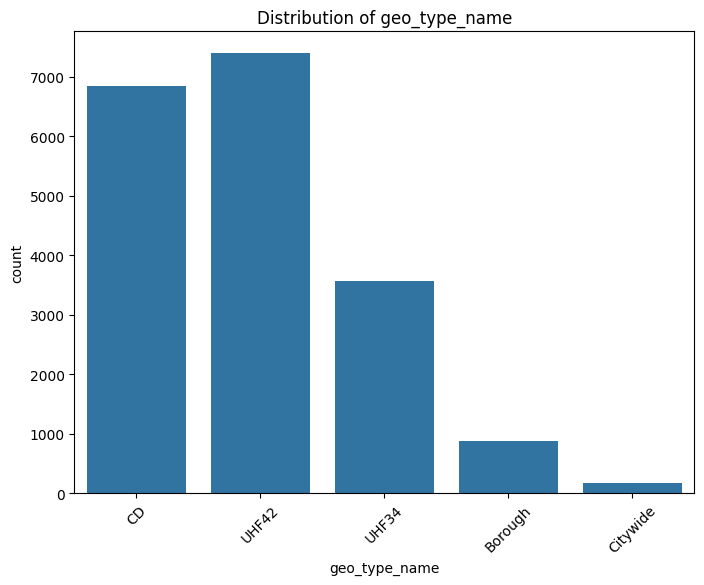


Value counts for geo_join_id:
geo_join_id
407       397
207       397
211       397
206       397
401       397
         ... 
305307    105
503504    105
309310    105
306308    105
501502    105
Name: count, Length: 72, dtype: int64


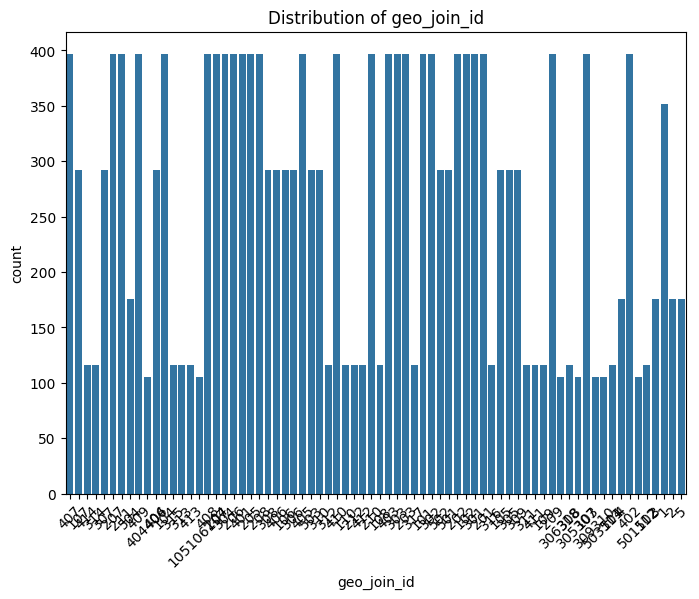


Value counts for geo_place_name_y:
geo_place_name_y
Williamsburg - Bushwick         281
Southeast Queens                281
Jamaica                         281
Pelham - Throgs Neck            281
East New York                   281
                               ... 
Chelsea-Village                 105
Upper East Side-Gramercy        105
Southern SI                     105
Union Square-Lower Manhattan    105
Northern SI                     105
Name: count, Length: 114, dtype: int64


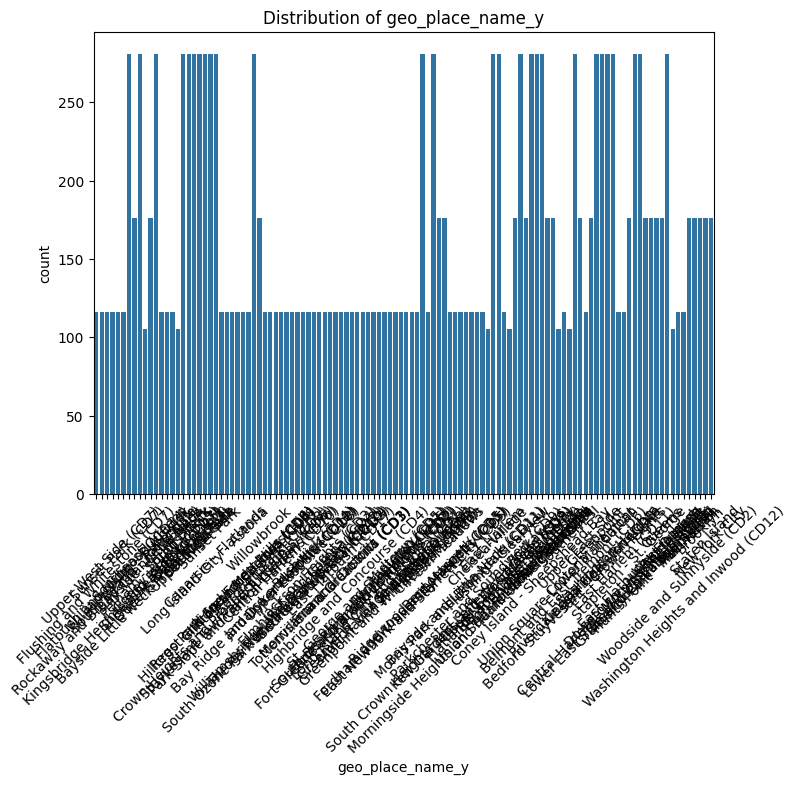


Value counts for time_period_y:
time_period_y
2009-2011              480
2017-2019              480
2015-2017              480
2005-2007              480
2012-2014              480
Summer 2009            423
Summer 2019            423
Summer 2015            423
Summer 2016            423
Summer 2022            423
Summer 2018            423
Summer 2020            423
Summer 2013            423
Summer 2010            423
Summer 2023            423
Summer 2014            423
Summer 2017            423
Summer 2012            423
Summer 2011            423
Summer 2021            423
2005                   417
2019                   321
2010                   321
Annual Average 2021    282
Winter 2021-22         282
Winter 2019-20         282
Winter 2008-09         282
Winter 2017-18         282
Annual Average 2022    282
Annual Average 2019    282
Winter 2013-14         282
Winter 2010-11         282
Annual Average 2013    282
Winter 2020-21         282
Winter 2014-15         282
Winter 2

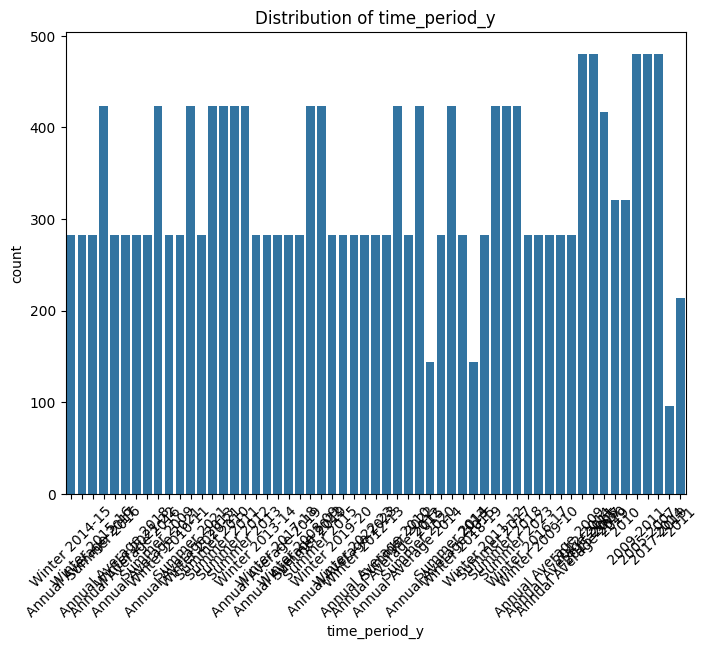


Value counts for data_value:
data_value
2              46
5              45
10             41
9              38
4              36
               ..
18.72074056     1
30.42566724     1
41.213353       1
18.61           1
34.91394865     1
Name: count, Length: 7375, dtype: int64


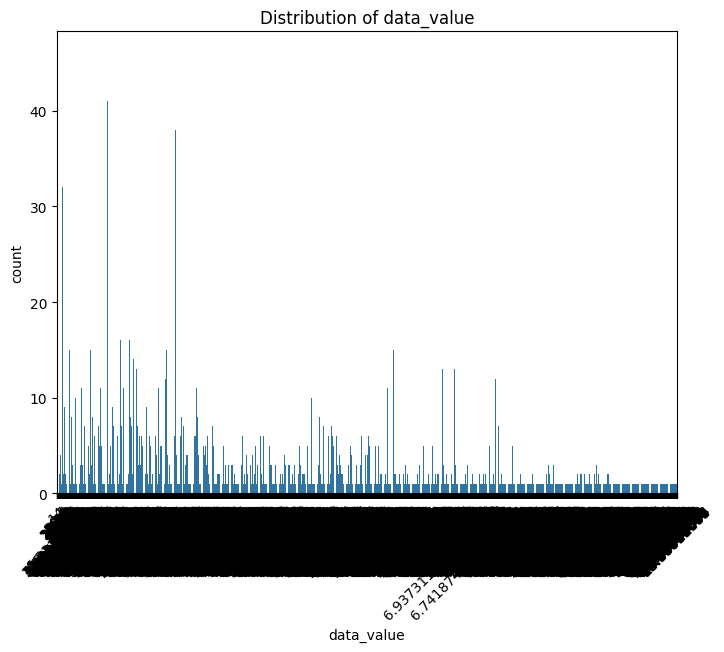


Value counts for message:
Series([], Name: count, dtype: int64)


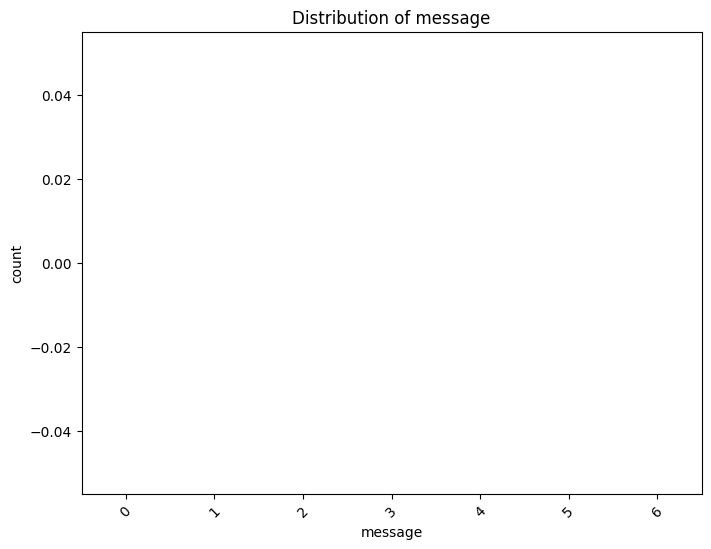

In [ ]:
# Step 6: Categorical Data Analysis (if applicable)
# Assuming there are categorical columns such as 'city', 'country', etc.
categorical_columns = merged_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(merged_df[col].value_counts())

    # Visualize the distribution of categorical data
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=merged_df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

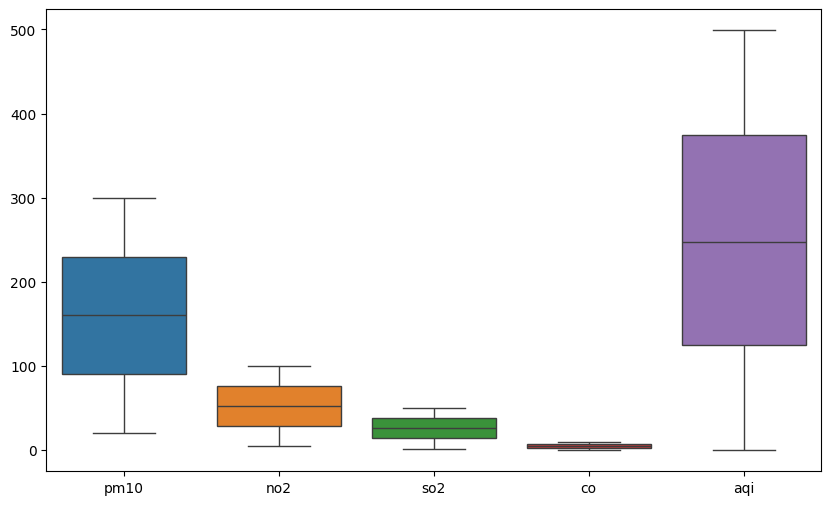

In [ ]:
# Boxplot for CSV data
plt.figure(figsize=(10, 6))
sns.boxplot(data=csv_df)
plt.show()

In [ ]:
# Question 1) Calculate average AQI on the merged dataset
average_aqi = df['aqi'].mean()

print(f"Average Air Quality Index (AQI): {average_aqi:.2f}")

Average Air Quality Index (AQI): 249.12


In [ ]:
# Save the summary to a new CSV file
summary_df = pd.DataFrame({'Average_AQI': [average_aqi]})
summary_df.to_csv("aqi_summary.csv", index=False)

print("Summary saved to 'aqi_summary.csv'")

Summary saved to 'aqi_summary.csv'


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('merged_air_quality_data.csv')

# List of pollutant columns (update if your column names are different)
pollutant_cols = ['pm10', 'no2', 'so2','co']
# Calculate average concentration of each pollutant
average_pollutants = df[pollutant_cols].mean()

In [ ]:
# Question 2) Find the pollutant with the highest average on the merged dataset
max_pollutant = average_pollutants.idxmax()
max_value = average_pollutants.max()

In [ ]:
print("Average concentration of pollutants:")
print(average_pollutants)

print(f"\nPollutant with highest average concentration: {max_pollutant} ({max_value:.2f} µg/m³)")

Average concentration of pollutants:
pm10    160.085732
no2      52.590177
so2      26.171064
co        5.068596
dtype: float64

Pollutant with highest average concentration: pm10 (160.09 µg/m³)


In [ ]:
# Save the summary to a CSV file
summary_df = average_pollutants.reset_index()
summary_df.columns = ['Pollutant', 'Average Concentration (µg/m³)']
summary_df['Max Average Pollutant'] = summary_df['Pollutant'] == max_pollutant

# Save to file
summary_df.to_csv('pollutant_summary.csv', index=False)

print("\nSummary saved to 'pollutant_summary.csv'")


Summary saved to 'pollutant_summary.csv'


In [ ]:
# Question3) How many unique geographic place names (geo_place_name) are represented in the JSON dataset?
import requests # Import the requests module to make HTTP requests
json_url = "https://data.cityofnewyork.us/api/views/c3uy-2p5r/rows.json?accessType=DOWNLOAD"
response = requests.get(json_url)
json_data = response.json()
# Count unique place names
unique_places = json_df['geo_place_name'].nunique()
print(f"Number of unique geographic places: {unique_places}")

Number of unique geographic places: 114


In [ ]:
# Save the summary to a new CSV file
summary_df = pd.DataFrame({'Unique_Geo_Places_Count': [unique_places]})
summary_df.to_csv('geo_place_summary.csv', index=False)

print("Summary saved to 'geo_place_summary.csv'")

Summary saved to 'geo_place_summary.csv'


In [ ]:
# Question 4) How many records were reported in each time period (time_period) in the JSON dataset?
# Count records by time period
time_period_counts = json_df['time_period'].value_counts()

print("Record counts per time period:")
print(time_period_counts)

Record counts per time period:
time_period
2009-2011              480
2017-2019              480
2015-2017              480
2005-2007              480
2012-2014              480
Summer 2009            423
Summer 2019            423
Summer 2015            423
Summer 2016            423
Summer 2022            423
Summer 2018            423
Summer 2020            423
Summer 2013            423
Summer 2010            423
Summer 2023            423
Summer 2014            423
Summer 2017            423
Summer 2012            423
Summer 2011            423
Summer 2021            423
2005                   417
2019                   321
2010                   321
Annual Average 2021    282
Winter 2021-22         282
Winter 2019-20         282
Winter 2008-09         282
Winter 2017-18         282
Annual Average 2022    282
Annual Average 2019    282
Winter 2013-14         282
Winter 2010-11         282
Annual Average 2013    282
Winter 2020-21         282
Winter 2014-15         282
Winter 2015-

In [ ]:
# Save the summary to a new CSV file
summary_df = time_period_counts.reset_index()
summary_df.columns = ['Time Period', 'Record Count']

# Save to file
summary_df.to_csv('time_period_summary.csv', index=False)

print("Summary saved to 'time_period_summary.csv'")

Summary saved to 'time_period_summary.csv'


In [ ]:
# Question5) What are the top 5 most frequent geo_place_name values in the CSV dataset?
top_geo_places = csv_df['geo_place_name'].value_counts().head(5)
print("Top 5 most frequent geo_place_name values:")
print(top_geo_places)

Top 5 most frequent geo_place_name values:
geo_place_name
New York       4749
Los Angeles    4749
Chicago        4749
Houston        4749
Phoenix        4749
Name: count, dtype: int64


In [ ]:
# Question 6) Which pollutant has the highest maximum value in the CSV dataset?
# Define the list of pollutant columns
pollutant_columns = ['pm10', 'no2', 'so2', 'co']  # Adjust column names if necessary

max_values = csv_df[pollutant_columns].max()
highest_pollutant = max_values.idxmax()
highest_value = max_values.max()

print(f"The pollutant with the highest maximum value is {highest_pollutant} ({highest_value}).")

The pollutant with the highest maximum value is pm10 (299.98).


In [ ]:
 # Question 7) How many records have pm2_5 levels greater than 35 (µg/m³)?
high_pm25_records = csv_df[csv_df['pm10'] > 35]
print(f"Number of records with PM2.5 > 35 µg/m³: {len(high_pm25_records)}")

Number of records with PM2.5 > 35 µg/m³: 22448
